### Imports

In [104]:
from typing import List, Tuple

import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

### Make dataset

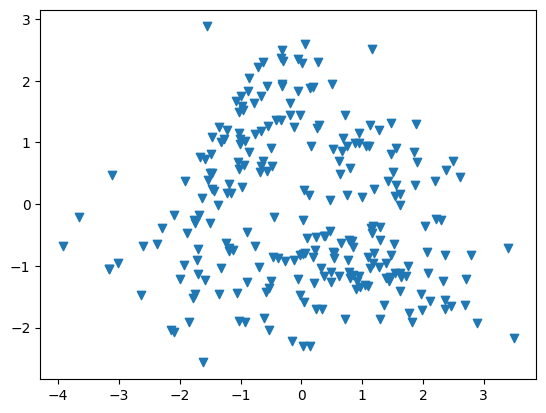

In [105]:
X, y = make_classification(n_samples=250, n_features=2, n_redundant=0, n_informative=2)
X_train, X_test, y_train, y_test = train_test_split(X, y)
plt.scatter(X[:, 0], X[:, 1], marker='v')

### Implement required classes

In [110]:
    class Node():
        def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
            self.feature = feature
            self.threshold = threshold
            self.left = left
            self.right = right
            self.value = value

In [111]:
class DecisionTree():
        
    def __init__(self, min_samples=2, max_depth=10):
        self.root = None
        self.min_samples = min_samples
        self.max_depth = max_depth

    def calcEntropy(self, y:List) -> float:
        proba = np.bincount(y) / len(y)
        return -np.sum([p * np.log2(p) for p in proba if p > 0])


    def infoGain(self, X:List[List], y:List, threshold: float) -> float:
        n = len(y)
        left_data, right_data = self.splitData(X, threshold)
        n_l, n_r = len(left_data), len(right_data)

        parent_loss = self.calcEntropy(y)
        child_loss = (n_l / n) * self.calcEntropy(y[left_data])  + (n_r / n) * self.calcEntropy(y[right_data])
        return parent_loss - child_loss

    
    def splitData(self, X: List[List], threshold: int) -> Tuple:
        left_data, right_data = np.argwhere(X <= threshold).flatten(), np.argwhere(X > threshold).flatten()
        return left_data, right_data

    
    def buildTree(self, X:List[List], y:List, depth=0):
        self.n_features, self.n_samples = len(X[0]), len(X)
        self.n_classes = len(np.unique(y))

        if depth >= self.max_depth or self.n_classes <= 1 or self.n_samples < self.min_samples:
            return Node(value=max(np.bincount(y)))

        rand_feature = np.random.choice(self.n_features, self.n_features, replace=False)
    
        _info_gain, split_idx, split_threshold = -1, None, None
    
        for _feat in rand_feature:
            X_feature = X[:, _feat]
            thresholds = np.unique(X_feature)
            for threshold in thresholds:
                curr_gain = self.infoGain(X_feature, y, threshold)
                if curr_gain > _info_gain:
                    _info_gain = curr_gain
                    split_idx = _feat
                    split_threshold = threshold
    
        left_idxs, right_idxs = self.splitData(X[:, split_idx], split_threshold)
        left = self.buildTree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self.buildTree(X[right_idxs, :], y[right_idxs], depth + 1)
        
        return Node(split_idx, split_threshold, left, right)

    def traverseTree(self, X: List[List], Node):
        if Node.value is not None:
            return Node.value
            
        if X[Node.feature] <= Node.threshold:
            return self.traverseTree(X, Node.left)
            
        return self.traverseTree(X, Node.right)

    def fit(self, X:List[List], y:List):
        self.root = self.buildTree(X, y)
    
    def predict(self, X:List[List]):
        preds = [self.traverseTree(x, self.root) for x in X]
        return np.array(preds)


### Compare to imported sklearn function

In [114]:
imported_dt = DecisionTreeClassifier(criterion='entropy')
imported_dt.fit(X_train, y_train)
print(imported_dt.predict(X_test))

[0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0
 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0]


In [115]:
my_dt = DecisionTree(max_depth=1)
my_dt.fit(X_train, y_train)
print(my_dt.predict(X_test))

[90 90 90 83 83 90 90 90 83 83 90 90 90 83 90 83 83 90 90 90 83 90 90 83
 83 83 90 90 83 90 90 83 83 83 90 90 90 83 83 90 90 83 90 83 90 90 83 90
 83 83 83 83 90 90 90 90 83 83 83 83 90 90 90]


As you can see it classifies data correctly but for some reason each iteration of generating numbers it changes its values. I have no clue why did it happen.

In this case 90 == '0' and 83 == '1'.